In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import plot_query, score_query, score_model_similarity, Marr2Algorithms
from csv_analysis import make_regression_plots
import numpy as np
import seaborn as sb
import sys
from scipy.stats import wilcoxon, ttest_1samp, mannwhitneyu, pearsonr
sb.set()
from matplotlib import pyplot as pl
np.random.seed()
%matplotlib inline
sb.set()
current_palette = sb.color_palette()



In [2]:
run pc_model

Building Independent Reg Model
Building Independent Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
[Counter({1: 112, 2: 19, 3: 8}), Counter({2: 61, 1: 54, 3: 24}), Counter({1: 85, 2: 33, 3: 21})]


in bayes
One Sample T on Medians
Ttest_1sampResult(statistic=-17.349351572897479, pvalue=1.4660142440096302e-22)
[0.022781457386122587, 0.011772051206276392, 0.16230514008667341]


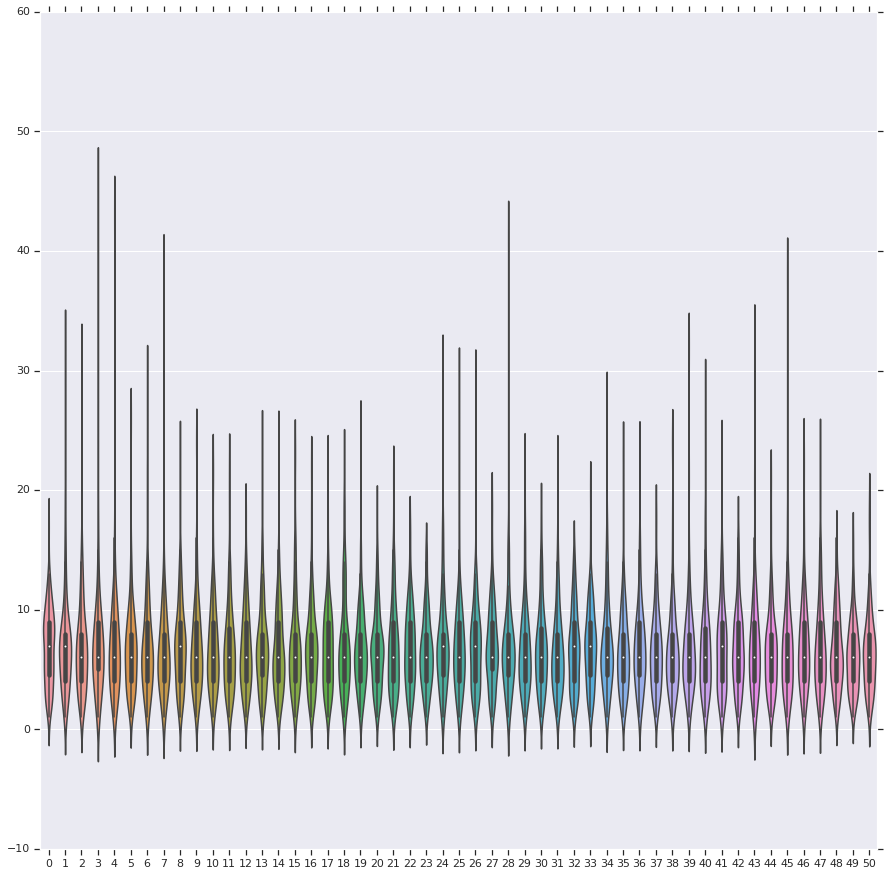

[]


In [2]:
p_inits = np.load('p_inits.npy').tolist()
strike_params = np.load('strike_params.npy')
marralgs = Marr2Algorithms(p_inits, strike_params, 0)
marralgs.marr_bdb_file.np_prng.seed()
marralgs.run_marr2_models(50)
marralgs.result_compiler()
print marralgs.fails

One Sample T on Medians
Ttest_1sampResult(statistic=-17.349351572897479, pvalue=1.4660142440096302e-22)
[0.35331485495277959, 0.011772051206276392, 0.16230514008667341]


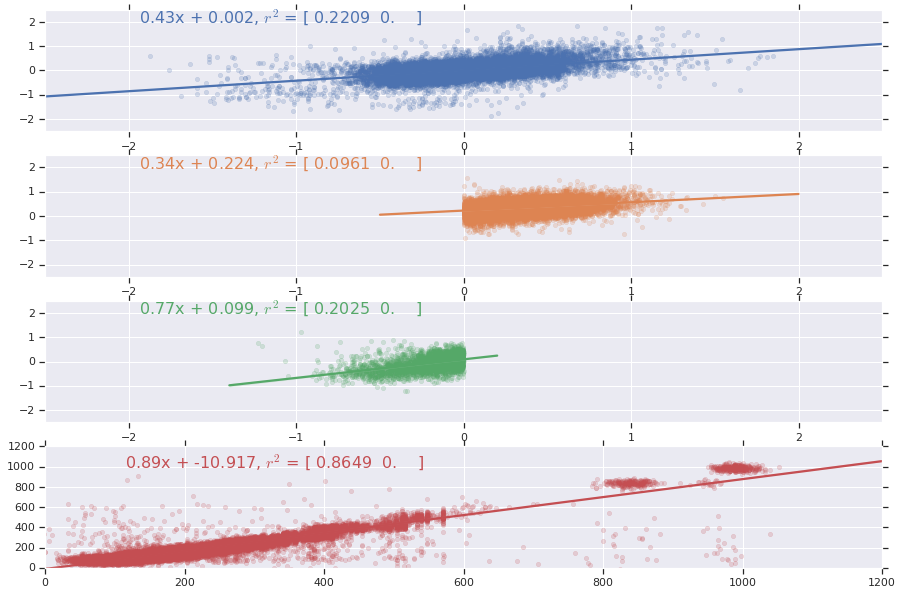

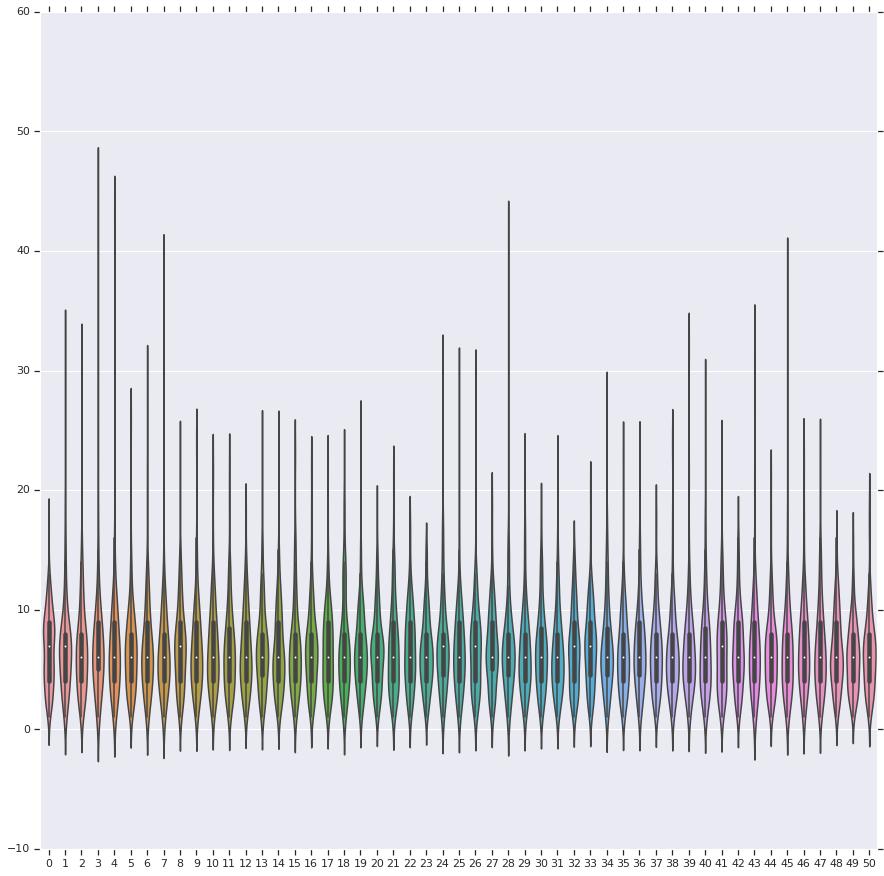

In [3]:
marralgs.validate_bayes_model(1)
#marralgs.averages

In [8]:
[(tr, av) for tr, av in zip(marralgs.test_results, marralgs.averages[1:])]
#marralgs.averages
np.mean([7,
   29,
   21,
   20,
   27,
   15,
   35,
   14,
   16,
   18,
   21,
   14,
   12,
   18,
   26,
   28,
   19,
   7,
   21,
   14,
   15,
   13,
   31,
   11,
   15,
   17,
   14,
   30,
   39,
   20,
   27,
   10,
   17,
   9,
   26,
   14,
   23,
   28,
   35,
   27,
   14,
   16,
   15,
   31,
   22,
   10,
   2,
   21,
   45,
   34])

20.260000000000002

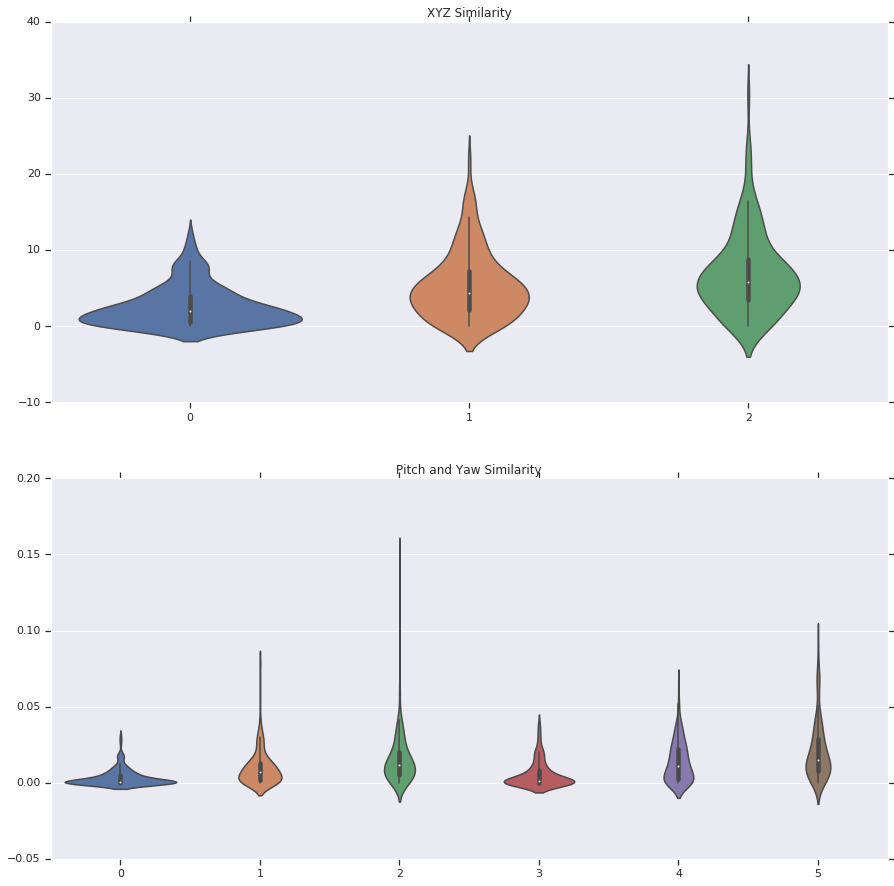

XYZ Quartiles
[[0.5327764709797287, 1.9508051313189687, 4.024517621170556], [2.18557139670569, 4.3383017008302796, 7.19283090107671], [3.493200866954803, 5.803932878069526, 8.773694130058646]]
Pitch Quartiles
[[0.0, 0.000725, 0.0051045454545454545], [0.001594642857142857, 0.006893246187363833, 0.013098333333333332], [0.005008333333333333, 0.011803333333333334, 0.019950000000000002]]
Yaw Quartiles
[[0.0, 0.0011916666666666668, 0.008053968253968254], [0.0022, 0.011041666666666665, 0.02204318181818182], [0.00755, 0.015194444444444444, 0.028995833333333332]]


In [14]:
#sb.set_style('white')
#score_trajectory_similarity(True, simlist_by_hunt[100][0], simlist_by_hunt[100][2])
sms = score_model_similarity(1, 2, simlist_by_hunt, 3)

([0.56999999999999995,
  0.69999999999999996,
  0.84999999999999998,
  0.84999999999999998],
 [0.014999999999999999, 0.086999999999999994, 0.059999999999999998, -11.878])

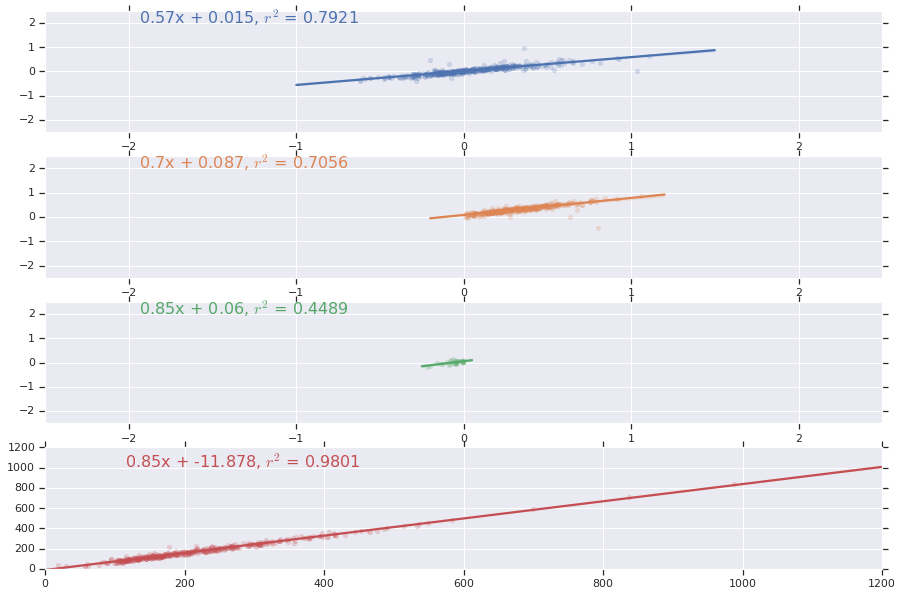

In [16]:
validate_model_transformations(sms[4][0], sms[4][1])
#multiple_regression_model_velocity[1].summary()

In [13]:
len(sms[4][1])

0

In [4]:
marralgs.static_params

{'alt_b_neg': 0.128,
 'alt_b_pos': 0.22900000000000001,
 'alt_m_neg': 0.82999999999999996,
 'alt_m_pos': 0.32000000000000001,
 'az_b': 0.014999999999999999,
 'az_m': 0.40999999999999998,
 'dist_b': -12.736000000000001,
 'dist_m': 0.89000000000000001}

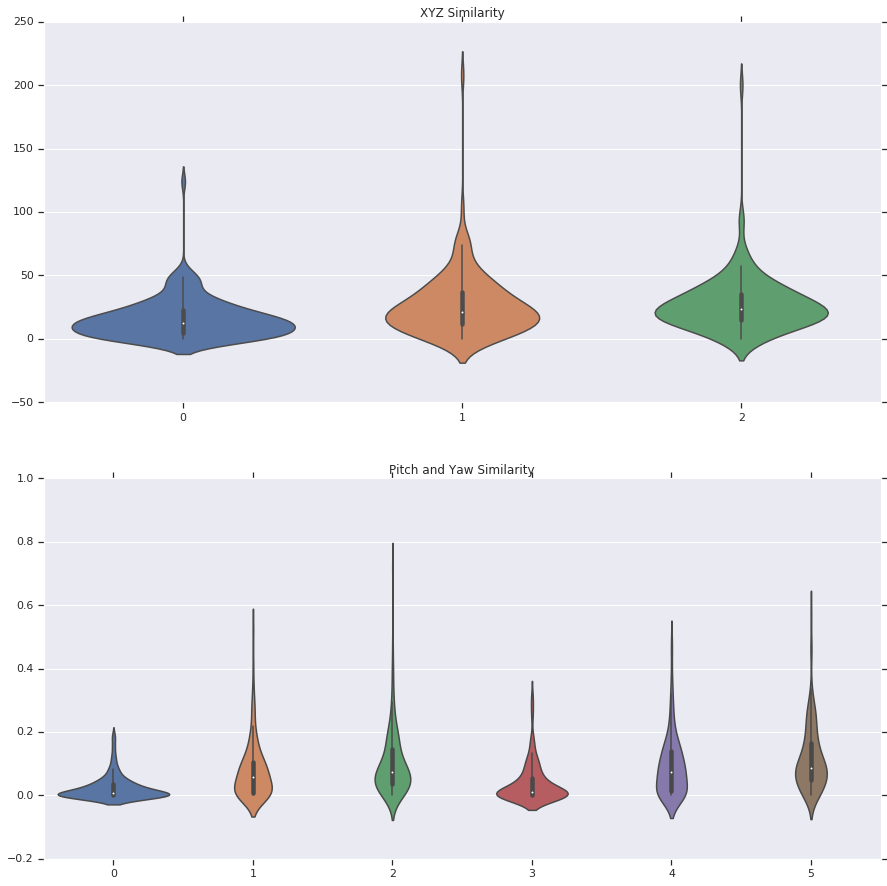

XYZ Quartiles
[[4.497439599730038, 12.71008544129727, 22.46948990851141], [11.630564237310848, 21.504656636209138, 36.971842291533946], [14.62923058792722, 23.770482196685066, 35.747395236398305]]
Pitch Quartiles
[[0.0, 0.006633333333333333, 0.03594101633393829], [0.006757142857142857, 0.05884047619047619, 0.10624350000000002], [0.03743125, 0.07238264705882352, 0.14644107142857143]]
Yaw Quartiles
[[0.0, 0.011484126984126984, 0.05374657142857142], [0.014243750000000001, 0.07362916666666666, 0.14094732142857141], [0.04778854166666667, 0.08695208333333333, 0.1637763636363636]]


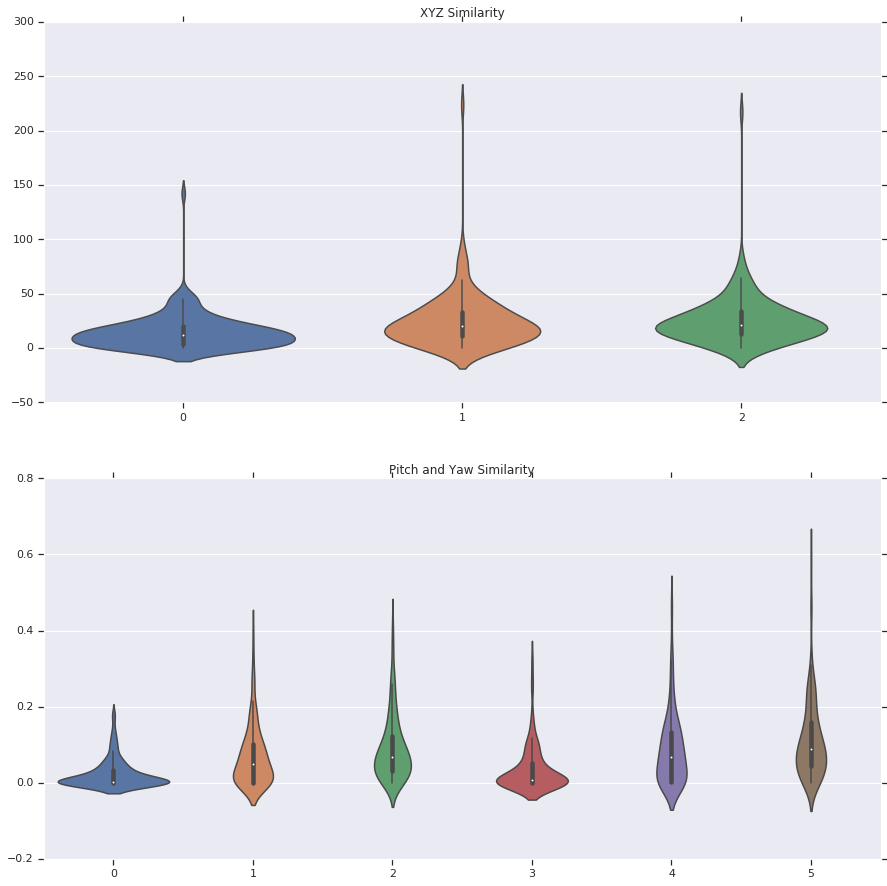

XYZ Quartiles
[[3.2190931132896132, 11.65494718840384, 19.893886658181984], [10.637498658345937, 19.758713369630424, 33.14159668659299], [12.865945224642296, 20.864377662300853, 33.96949736963982]]
Pitch Quartiles
[[0.0, 0.0019000000000000002, 0.03318809523809524], [0.00039166666666666674, 0.04922, 0.10056357142857142], [0.030157857142857146, 0.06823749999999999, 0.12230416666666667]]
Yaw Quartiles
[[0.0, 0.005833333333333334, 0.051633374999999995], [0.0016083333333333331, 0.06787916666666667, 0.13333176470588232], [0.0437, 0.08751118421052631, 0.1583668181818182]]


In [9]:
scores01 = score_model_similarity(0, 1, simlist_by_hunt, 3)
scores02 = score_model_similarity(0, 2, simlist_by_hunt, 3)
#scores04 = score_model_similarity(0, 4, simlist_by_hunt)
#scores23 = score_model_similarity(2, 3, simlist_by_hunt)



In [27]:
wilcoxon(scores01[3][0], scores02[3][0])
# KEY RESULT. Significantly different towards velocity being smaller 

NameError: name 'scores01' is not defined

In [ ]:
labels['Para Az', 'Postbout Para Az']
# STILL HAVE TO INDEX OUT AZ, ALT, DIST. ALMOST THERE
make_regression_plots(scores01[4][:,0], scores01[4][:,1], scores01[5][:, 0], scores01[5][:, 1], )

In [ ]:
%debug

> /home/jovyan/PreycapMaster/pc_model.py(988)avg_of_partitions()
    986         for n in range(num_partitions):
    987             partition_means = [np.nanmean(
--> 988                 prt[n]) for prt in extracted_partitions]
    989             means_by_partition.append(partition_means)
    990         return means_by_partition

ipdb> num_partitions
4
ipdb> [prt for prt in extracted_partitions]
[[(0.0, 0.0, 0.0, 0.0, 0.0, 1.4794089876966154, 1.4218060062965492, 0.95612905937406367, 2.7559403959724023, 2.8455799821971368, 2.586515667261807, 3.7126084474632535, 4.1539551508395789, 3.6233901603012555, 2.7543235423831902, 4.3375503052889144, 4.267957785402416, 3.6141656129352668, 1.9067203935983343, 5.9277349932269203, 13.477937575063606, 1.4299512938696921, 11.154460014293079, 20.495007351704544, 0.49611750539270361, 14.984224861029588, 22.385779498105876, 1.2912125861581671, 16.191646454997681, 21.373117744495175, 0.036849052460695475, 19.144893813533031, 20.124828454506542, 0.626340

ipdb> [prt for prt in extracted_partitions if prt==[]]
[[]]
ipdb> [i for i,prt in enumerate(extracted_partitions) if prt==[]]
[107]


In [20]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.marr_bdb_file.np_prng

In [5]:
marralgs.run_marr2_models()

in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


In [8]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.run_marr2_models()


in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]
[(), (), (), (), (), (), (), (), ()]
[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]
[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]
[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]


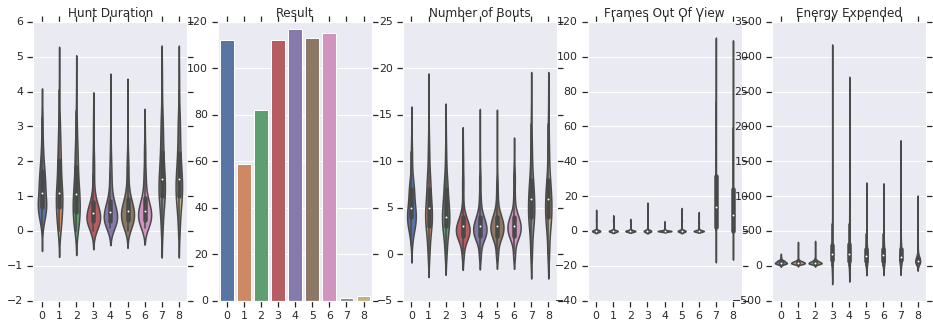

In [3]:
fig = plot_query(ms, p_inits, strike_params, 'violin')
fig.savefig('model_results.pdf')